# Thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

# Xây dựng dữ liệu

In [2]:
data = pd.DataFrame(np.random.standard_normal((1000, 3)), columns=['x_1', 'x_2', 'x_3'])
data['x_12'] = data['x_1'] + np.random.standard_normal(1000)
data['x_22'] = data['x_2'] + np.random.standard_normal(1000)
data.head(10)

,x_1,x_2,x_3,x_12,x_22
0,-0.490872,-0.740678,0.524974,-1.860988,-1.744999
1,0.925793,1.635419,0.778178,0.299356,2.928315
2,-1.999274,1.233817,0.270560,1.041861,2.121077
3,-0.392829,0.202712,0.644649,-1.135997,1.297740
4,0.716874,1.728463,-0.612732,-0.029981,1.366063
5,-1.065850,-0.416278,0.227099,0.582619,0.106715
6,2.016022,-1.331730,0.846289,2.829108,-2.623297
7,0.571052,0.432714,1.335914,1.793618,-0.427880
8,-0.828690,0.235364,0.757151,-1.096226,-0.132246
9,0.761266,-1.117452,0.412042,0.014127,-1.087253


In [3]:
data = data.to_numpy()

# Chuẩn hóa dữ liệu

In [4]:
scaled_data = StandardScaler().fit_transform(data)
pd.DataFrame(scaled_data, columns=['x_1', 'x_2', 'x_3', 'x_12', 'x_22']).head(10)

,x_1,x_2,x_3,x_12,x_22
0,-0.506972,-0.708974,0.480996,-1.330732,-1.192430
1,0.877785,1.706777,0.733020,0.182922,2.130939
2,-1.981399,1.298473,0.227767,0.703161,1.556882
3,-0.411137,0.250160,0.600113,-0.822764,0.971375
4,0.673572,1.801375,-0.651412,-0.047830,1.019962
5,-1.068999,-0.379160,0.184508,0.381391,0.124393
6,1.943458,-1.309890,0.800814,1.955403,-1.817021
7,0.531034,0.484000,1.288159,1.229882,-0.255777
8,-0.837180,0.283357,0.712091,-0.794899,-0.045541
9,0.716964,-1.092036,0.368589,-0.016925,-0.724682


# Đồ thị sự phụ thuộc của "Phần trăm thông tin được bảo toàn (%)" với "Số chiều của không gian con"

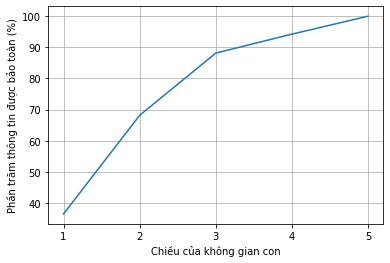

In [5]:
pca = PCA().fit(scaled_data)

plt.plot(np.arange(1, 6), 100 * np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Chiều của không gian con')
plt.ylabel('Phần trăm thông tin được bảo toàn (%)')
plt.xticks(np.arange(1,6))
plt.grid()
plt.show()

# Biến đổi tập dữ liệu ban đầu vào không gian $\mathbb{R}^3$

In [6]:
pca = PCA(n_components=3).fit(scaled_data)
transformed_data = pd.DataFrame(pca.transform(scaled_data), columns=['x_1', 'x_2', 'x_3'])
transformed_data.head(10)

,x_1,x_2,x_3
0,0.022858,-1.867478,-0.527943
1,-1.441266,2.441005,-0.656888
2,-2.085657,0.780196,-0.032567
3,-1.256053,-0.013468,-0.536000
4,-1.074967,1.709337,0.681718
5,-0.224284,-0.468506,-0.124086
6,3.464944,0.419558,-0.982039
7,0.691798,1.011762,-1.309011
8,-0.964523,-0.699165,-0.672751
9,1.243239,-0.548070,-0.450365


# PCA tự xây dựng

In [7]:
class simple_PCA:
    def __init__(self):
        self.principal_components = None
        self.eigenvalues = None
        self.scaled_data = None
        self.scores = None
    def fit(self, X, isStandardized=False):
        '''
        Input:
            X: ndarray, shape (n, d).
            isStandardized: boolean.
        Output: None
        '''
        n, d = X.shape
        # Chuẩn hóa dữ liệu
        if (not isStandardized):
            mean = X.mean(axis=0)
            std = X.std(axis=0)
            self.scaled_data = (X - mean) / std
        else:
            self.scaled_data = X
        # Tính ma trận Sigma
        Sigma = 1/n * self.scaled_data.T @ self.scaled_data
        # Thực hiện phân rã trị riêng
        eigenvalues, eigenvector = np.linalg.eig(Sigma)
        # Cập nhật principal_components và eigenvalues
        sorted_index = np.argsort(eigenvalues)[::-1]
        self.eigenvalues = eigenvalues[sorted_index]
        self.principal_components = eigenvector[sorted_index]
        #Cập nhật scores
        self.scores = 100 * np.cumsum(self.eigenvalues / self.eigenvalues.sum())
    def transform_k(self, n_components):
        '''
        Input: 
            n_components: int.
        Output:
            Y: ndarray, shape (n, n_components).
        '''
        return self.scaled_data @ self.principal_components[:n_components].T
    def transform_r(self, r):
        '''
        Input:
            r: float, 0 <= r <= 100.
        Output:
            Y: ndarray, shape (n, n_components).
        '''
        n_components = np.searchsorted(self.scores, r) + 1
        return self.scaled_data @ self.principal_components[:n_components].T
    def plot_scores(self):
        n, d = self.scaled_data.shape
        plt.plot(np.arange(1, d+1), self.scores)
        plt.xlabel('Chiều của không gian con')
        plt.ylabel('Phần trăm thông tin được bảo toàn (%)')
        plt.xticks(np.arange(1, d+1))
        plt.grid()
        plt.show()

## Khởi tạo một instance simple_PCA và fit dữ liệu

In [8]:
pca = simple_PCA()
pca.fit(data)

## Vẽ đồ thị sự phụ thuộc của "Phần trăm thông tin được bảo toàn (%)" với "Số chiều của không gian con"

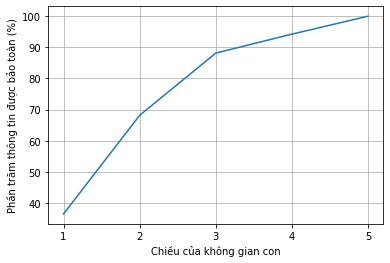

In [9]:
pca.plot_scores()

## Biến đổi dữ liệu bằng transform_k(3)

In [10]:
pd.DataFrame(pca.transform_k(3), columns=['x_1', 'x_2', 'x_3']).head(5)

,x_1,x_2,x_3
0,-0.148819,0.661222,-0.554769
1,1.434126,0.215234,-0.698371
2,2.129697,-1.444086,-0.309062
3,1.197897,-0.084096,-0.670760
4,1.168370,0.781461,0.678682


## Biến đổi dữ liệu bằng transform_r(80)

In [11]:
pd.DataFrame(pca.transform_r(80), columns=['x_1', 'x_2', 'x_3']).head(5)

,x_1,x_2,x_3
0,-0.148819,0.661222,-0.554769
1,1.434126,0.215234,-0.698371
2,2.129697,-1.444086,-0.309062
3,1.197897,-0.084096,-0.670760
4,1.168370,0.781461,0.678682
